#### Crawling project  
    - 잡코리아 크롤링은 통한 고용시장 분석

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen 
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import time
import numpy as np
from PIL import Image
from matplotlib.patches import ConnectionPatch
from crawling_funtion import *

In [ ]:
link_list, cor_title_list= get_links()

In [ ]:
#채용공고내 스킬 및 기업정보 링크 크롤링
skill_list, cor_link_list= get_skill(link_list)
print(cor_link_list)

In [ ]:
# 연봉정보 크롤링
    # 1. 연봉정보 링크 크롤링
salary_link_list= get_salary_links(cor_link_list)
    # 2. 연봉정보 크롤링
salary_list= get_salary_info(salary_link_list)

In [ ]:
# 공고 지역 크롤링
loc_list= get_loc(recuit_link_list)

------------------------------------------------------------------

#### 시각화

In [18]:
## 지역별 공고 수 시각화
    # 지역별 구인공고 분류
DF= pd.read_csv('지역정보.csv')
DF.drop(columns=['Unnamed: 0'], inplace=True)
DF_list= (DF['지역'])
seoul, busan, inchan, daegu, changju, gyunggi = 0,0,0,0,0,0
other=5
for list in DF_list:
    if ('서울') in list:
        seoul+=1 
    if ('경기') in list:
        gyunggi+=1
    if ('부산') in list:
        busan+=1 
    if ('대구') in list:
        daegu+=1
    if ('인천') in list: 
        inchan+=1 
    if ('충청북') in list:
        changju+=1

    # 시각화를 위해 리스트에 담기
pie_data_list=[busan+daegu+other, gyunggi, seoul]
sum_num=(busan+daegu+other)
bar_data_list=[busan/sum_num, daegu/sum_num, other/sum_num]
label_list=['그외', '경기','서울']

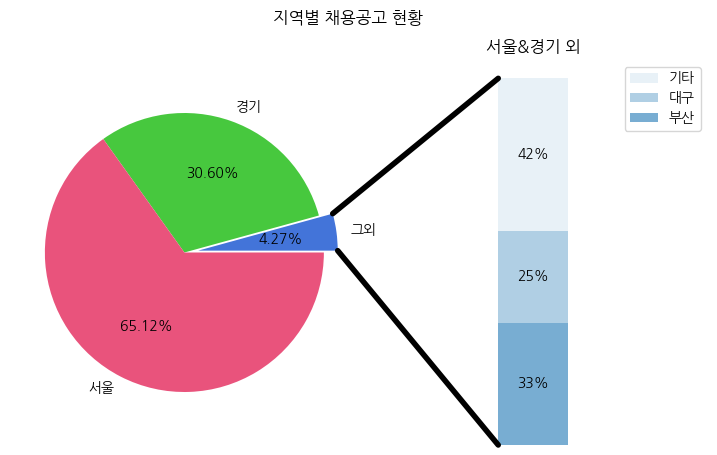

In [21]:
#파이그래프 그리기 (matplotlib 예시코드 참조)

fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(9,5))
fig.subplots_adjust(wspace=0)

#pie그리기
overall_ratios = pie_data_list
labels = label_list
explode = [0.1, 0, 0]
# 적은 비율이 오른쪽으로 향하도록 조정
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.2f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['#4374D9', '#47C83E', '#E9537C' ])

# bar 그리기
age_ratios = bar_data_list
age_labels = ['부산', '대구', '기타']
bottom = 1
width = .2

# 그외의 범주 추가
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('서울&경기 외')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# 파이차트와 막대그래프를 잇는 선 그리기
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# 위쪽 선 그리기
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# 아래쪽 선 그리기
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.suptitle('지역별 채용공고 현황')

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       298 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
None


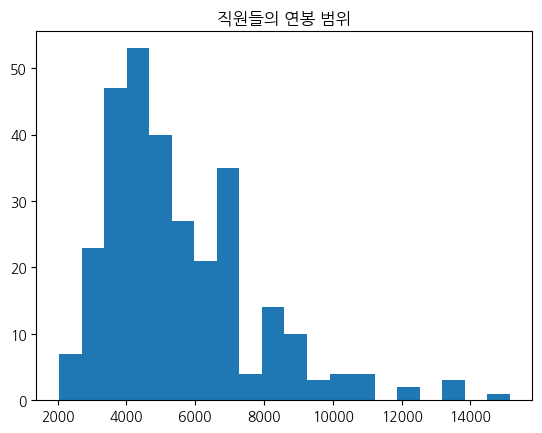

In [26]:
# 연봉 정보 시각화
DF=pd.read_csv('./연봉정보.csv')
DF.drop(columns=['Unnamed: 0'], inplace=True)
print(DF.info())

plt.hist(DF, bins=20, histtype='bar')
plt.xlabel='연봉(만원)'
plt.title('직원들의 연봉 범위')
plt.show()

[('AWS', 'Alpha')]
--------------------------------------------------------------------------------
[('JAVA', 'Alpha')]
--------------------------------------------------------------------------------
[('Node', 'Alpha'), ('.', 'Punctuation'), ('js', 'Alpha')]
--------------------------------------------------------------------------------
[('Python', 'Alpha')]
--------------------------------------------------------------------------------
[('SQL', 'Alpha')]
--------------------------------------------------------------------------------
[('Python', 'Alpha')]
--------------------------------------------------------------------------------
[('R', 'Alpha')]
--------------------------------------------------------------------------------
[('건설', 'Noun'), ('안전', 'Noun'), ('기사', 'Noun'), ('자격', 'Noun')]
--------------------------------------------------------------------------------
[('건설', 'Noun'), ('안전', 'Noun'), ('산업', 'Noun'), ('기사', 'Noun'), ('자격', 'Noun')]
----------------------------

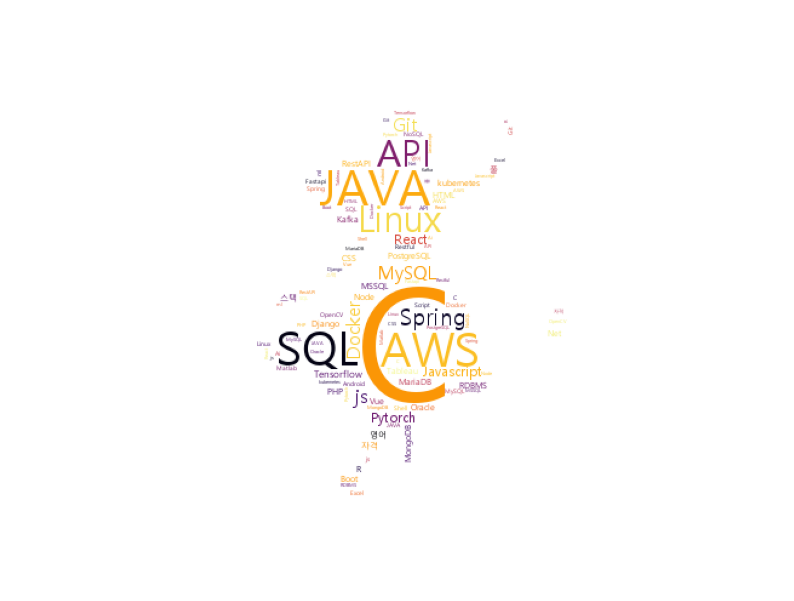

In [4]:
#스킬 정보 시각화
title_list= pd.read_csv('스킬정보.csv')['0']

word_count=50
stopwords=['python', 'Python']
path= r'c:\Windows\Fonts\malgun.ttf'
def make_skill_gragh():

    okt= Okt()
    sentences_tag= []

    for sentence in title_list:
        morph= okt.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-'*80)
    
    noun_adj_list=[]
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective', 'Alpha']:
                noun_adj_list.append(word)

    counts= Counter(noun_adj_list)
    tags= counts.most_common(word_count)
    print('-'*80)
    print(tags)

    tag_dict= dict(tags)

    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)

    img_mask= np.array(Image.open('alice_wordcloud.png'))
    wordcloud= WordCloud(font_path=path, width=800, height=600,
    background_color='white', max_font_size=200,
    repeat=True,
    colormap='inferno', mask=img_mask)
        
    cloud= wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
make_skill_gragh()

In [12]:
# 블로그 워드클라우드
import requests
    # 블로그 크롤링 함수
def get_titles(start_num, end_num, search_word, title_list):
    while start_num <= end_num:
        url= ('https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query={}&start={}'.format(search_word, start_num))

        req= requests.get(url)
        time.sleep(1)
        if req.ok:
            soup= BeautifulSoup(req.text, 'html.parser')
            news_titles= soup.find_all('div', {'class': 'title_area'})
            for news in news_titles:
                title_list.append(news.text)
        start_num+=10
        print('title 개수:', len(title_list))
        print(title_list)
    # 시각화 함수
def make_wordcloud(title_list, stopwords, word_count):
    okt= Okt()
    sentences_tag= []

    for sentence in title_list:
        morph= okt.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-'*80)
    
    noun_adj_list=[]
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective', 'Alpha']:
                noun_adj_list.append(word)

    counts= Counter(noun_adj_list)
    tags= counts.most_common(word_count)
    print('-'*80)
    print(tags)

    tag_dict= dict(tags)

    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)

    path= r'c:\Windows\Fonts\malgun.ttf'

    img_mask= np.array(Image.open('P.jfif'))
    wordcloud= WordCloud(font_path=path, width=800, height=600,
                         background_color='white', max_font_size=200,
                         repeat=True,
                         colormap='inferno', mask=img_mask)
    
    cloud= wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [ ]:
# 함수 실행

search_word= '파이썬'
title_list=[]
stopwords= [search_word, 'python', 'Python', '코딩', '아나콘다', '설치', '프로그래밍']

get_titles(1, 200, search_word, title_list)

make_wordcloud(title_list, stopwords, 50)